In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [46]:
dp=pd.read_csv('C:\\Users\\MY PC\\OneDrive\\Desktop\\ML_Assignement\\ML_Assignment_1\\Dsata_Set_for_Assignment 1.csv')
dp=dp.dropna()

In [47]:
dp.drop(['id'],axis=1,inplace=True)
Y=dp['diagnosis']
dp.drop(['diagnosis'],axis=1,inplace=True)
X=dp

In [48]:
Y = Y.replace({'B': 1, 'M': 0})
Y=Y.to_numpy()
Y.shape=(Y.shape[0],1)

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descent

In [49]:
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
X_train=X.iloc[:, 2:].values
X_test=X.iloc[:, 2:].values
Y_train=Y.iloc[:, 1].values
Y_test=Y.iloc[:, 1].values
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(377, 30) (186, 30) (377, 1) (186, 1)


In [50]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        X=pd.DataFrame(X)
        Y=pd.DataFrame(Y)
        k = np.random.randint(0,m)
        X_batch=X.iloc[k,:]
        Y_batch=Y.iloc[k,:]
        X_batch=X_batch.to_numpy()
        Y_batch=Y_batch.to_numpy()
        X_batch.shape=(1,X_batch.shape[0])
        y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.5,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
3.056956247832555
The recall of the model is: 
91.12903225806451
The precision of the model is: 
97.41379310344827
The f1_score of the model is: 
94.16666666666667


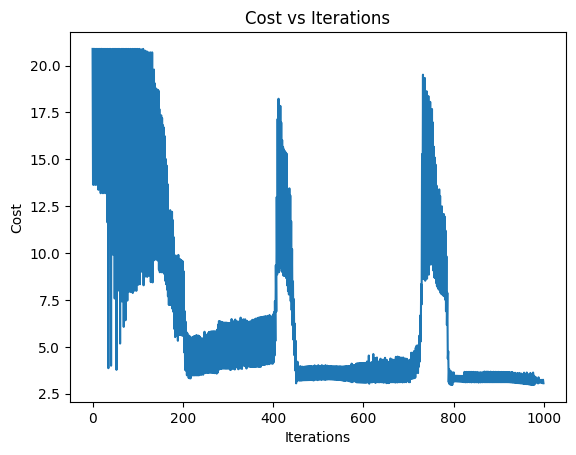

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    2.698404
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


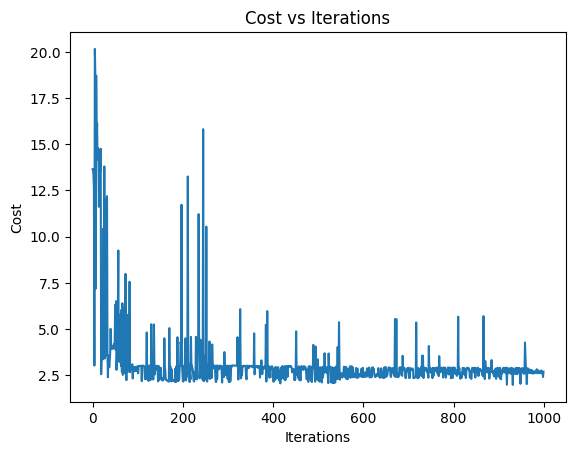

The accuracy of the model is: 
89.24731182795699
The cost of the model is: 
0    0.487213
dtype: float64
The recall of the model is: 
85.48387096774194
The precision of the model is: 
98.14814814814815
The f1_score of the model is: 
91.37931034482757


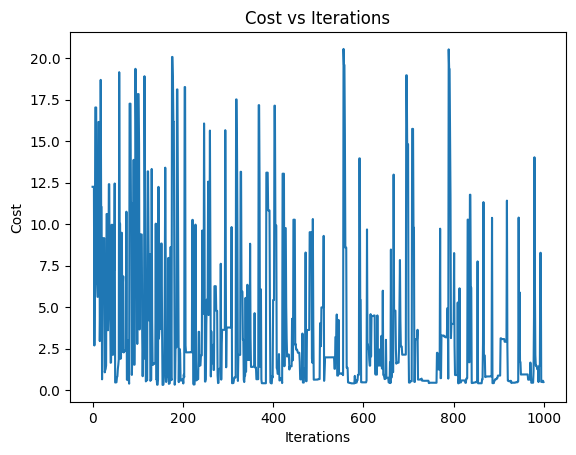

In [51]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('111.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1)) 
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('111_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('111_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
93.01075268817203
The cost of the model is: 
2.316146260447366
The recall of the model is: 
92.74193548387096
The precision of the model is: 
96.63865546218487
The f1_score of the model is: 
94.65020576131685


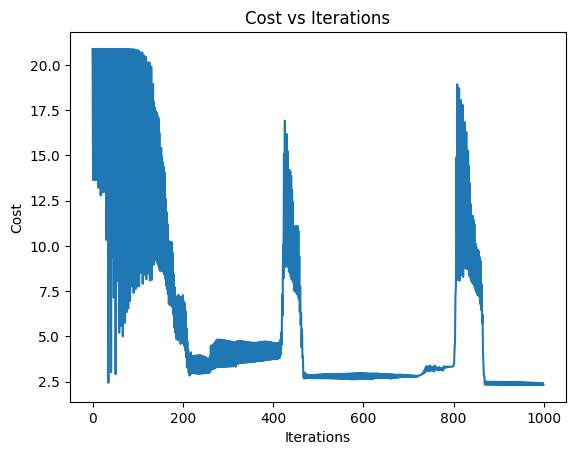

The accuracy of the model is: 
95.6989247311828
The cost of the model is: 
0    0.422075
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
94.61538461538461
The f1_score of the model is: 
96.85039370078741


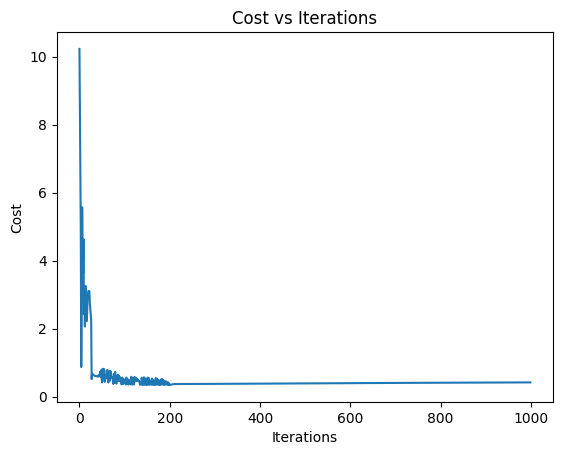

The accuracy of the model is: 
81.72043010752688
The cost of the model is: 
0    0.419546
dtype: float64
The recall of the model is: 
72.58064516129032
The precision of the model is: 
100.0
The f1_score of the model is: 
84.11214953271029


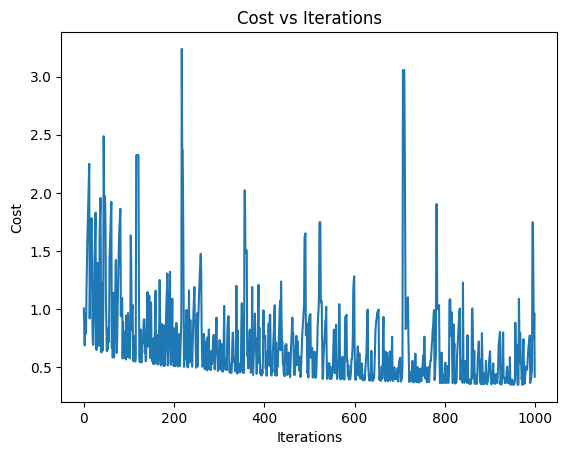

In [52]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('112.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('112_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('112_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.5

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descent

The accuracy of the model is: 
89.78494623655914
The cost of the model is: 
1.645944307877238
The recall of the model is: 
100.0
The precision of the model is: 
86.7132867132867
The f1_score of the model is: 
92.88389513108613


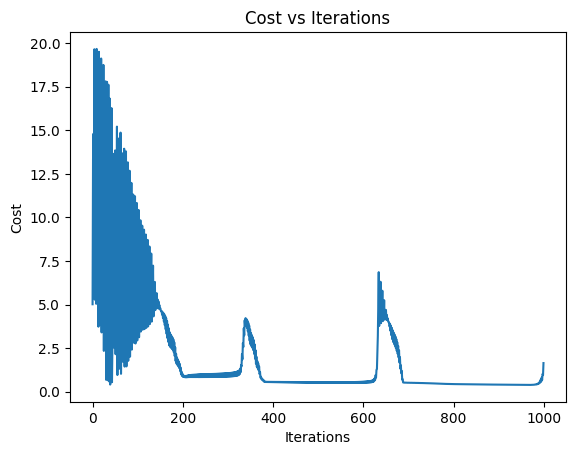

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    0.225636
dtype: float64
The recall of the model is: 
95.96774193548387
The precision of the model is: 
95.96774193548387
The f1_score of the model is: 
95.96774193548387


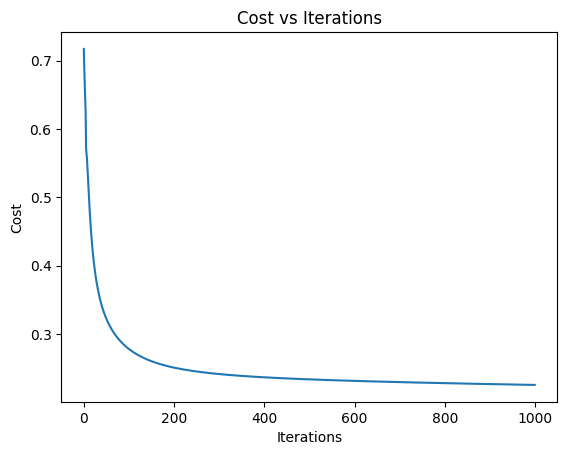

The accuracy of the model is: 
33.33333333333333
The cost of the model is: 
0    0.63628
dtype: float64
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


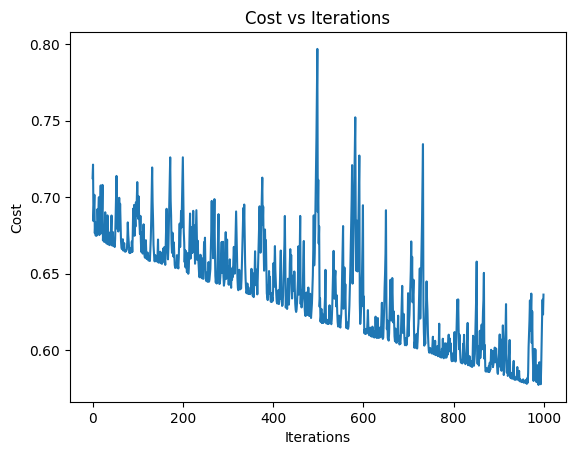

In [53]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('113.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('113_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('113_2.jpg')
plt.show()

# ****END OF PART->1****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descen

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(377, 30) (186, 30) (377, 1) (186, 1)


In [55]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        X=pd.DataFrame(X)
        Y=pd.DataFrame(Y)
        k = np.random.randint(0,m)
        X_batch=X.iloc[k,:]
        Y_batch=Y.iloc[k,:]
        X_batch=X_batch.to_numpy()
        Y_batch=Y_batch.to_numpy()
        X_batch.shape=(1,X_batch.shape[0])
        y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.3,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
3.056956247832555
The recall of the model is: 
91.12903225806451
The precision of the model is: 
97.41379310344827
The f1_score of the model is: 
94.16666666666667


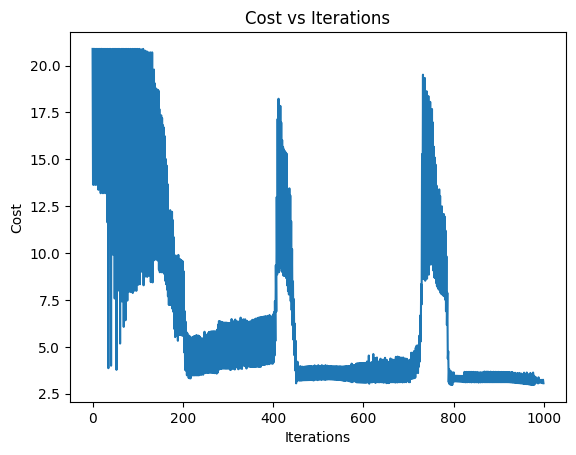

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    2.698404
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


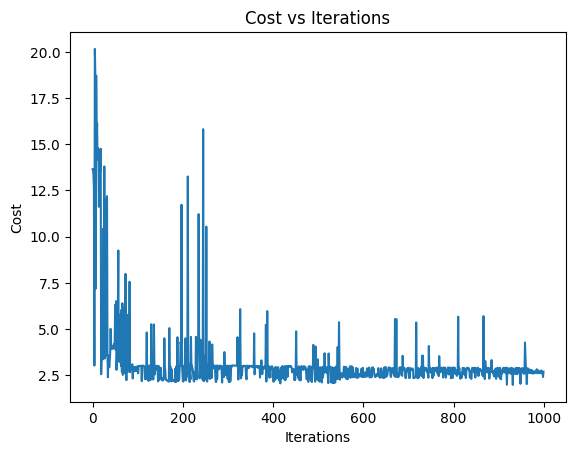

The accuracy of the model is: 
93.54838709677419
The cost of the model is: 
0    0.676026
dtype: float64
The recall of the model is: 
95.96774193548387
The precision of the model is: 
94.44444444444444
The f1_score of the model is: 
95.2


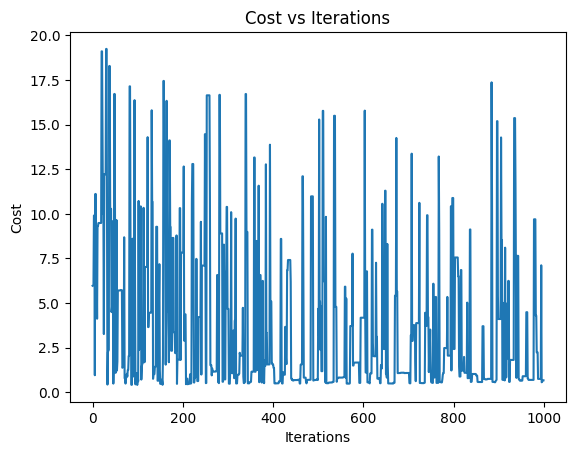

In [56]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('114.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('114_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('114_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
93.01075268817203
The cost of the model is: 
2.316146260447366
The recall of the model is: 
92.74193548387096
The precision of the model is: 
96.63865546218487
The f1_score of the model is: 
94.65020576131685


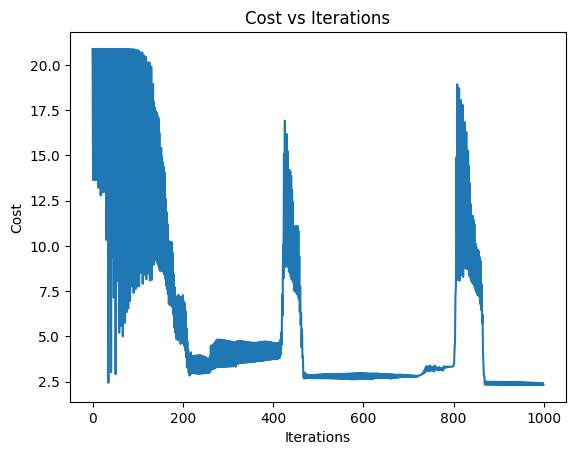

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    0.422075
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


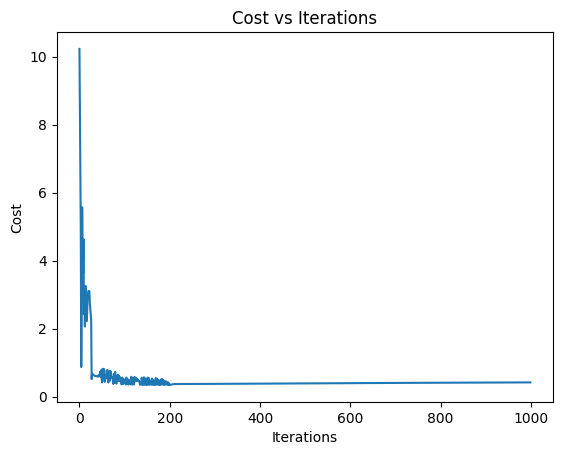

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    0.362237
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


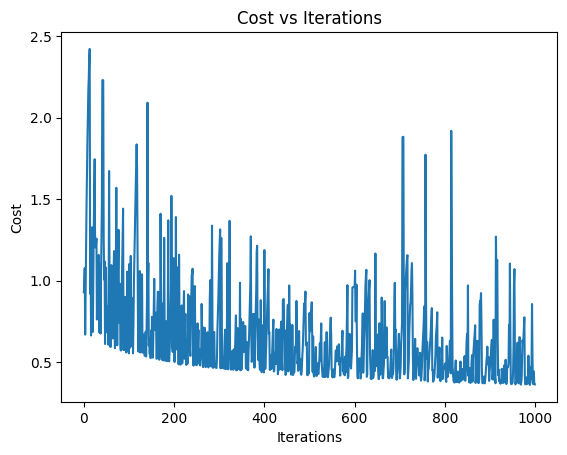

In [57]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('115.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('115_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('115_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.3

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
89.78494623655914
The cost of the model is: 
1.645944307877238
The recall of the model is: 
100.0
The precision of the model is: 
86.7132867132867
The f1_score of the model is: 
92.88389513108613


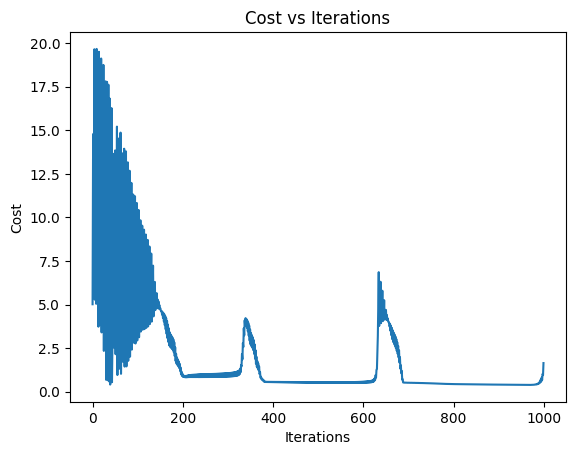

The accuracy of the model is: 
94.08602150537635
The cost of the model is: 
0    0.225636
dtype: float64
The recall of the model is: 
98.38709677419355
The precision of the model is: 
93.12977099236642
The f1_score of the model is: 
95.68627450980392


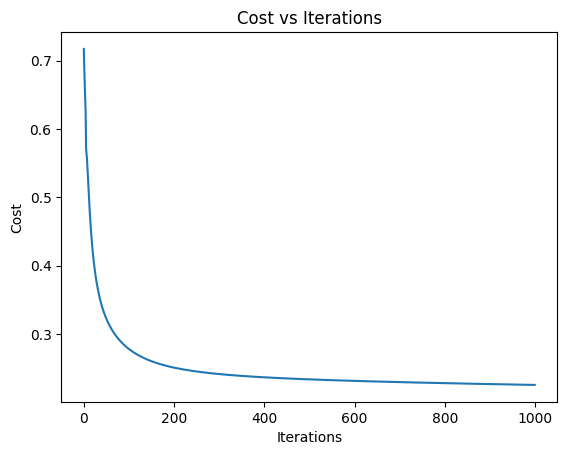

The accuracy of the model is: 
95.16129032258065
The cost of the model is: 
0    0.641648
dtype: float64
The recall of the model is: 
95.96774193548387
The precision of the model is: 
96.7479674796748
The f1_score of the model is: 
96.35627530364371


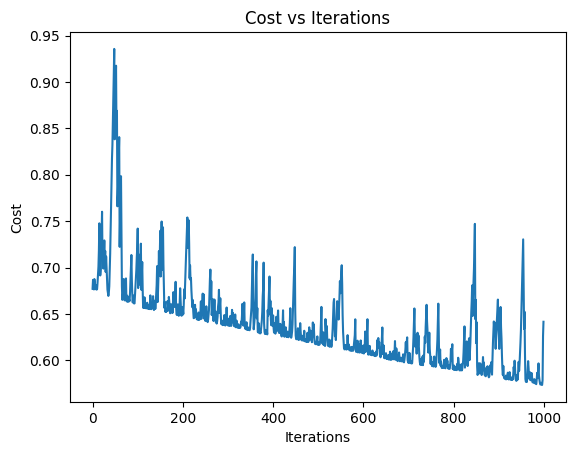

In [58]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('116.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('116_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('116_2.jpg')
plt.show()

# ****END OF PART->2****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descen

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(377, 30) (186, 30) (377, 1) (186, 1)


In [60]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        X=pd.DataFrame(X)
        Y=pd.DataFrame(Y)
        k = np.random.randint(0,m)
        X_batch=X.iloc[k,:]
        Y_batch=Y.iloc[k,:]
        X_batch=X_batch.to_numpy()
        Y_batch=Y_batch.to_numpy()
        X_batch.shape=(1,X_batch.shape[0])
        y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.4,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
3.056956247832555
The recall of the model is: 
91.12903225806451
The precision of the model is: 
97.41379310344827
The f1_score of the model is: 
94.16666666666667


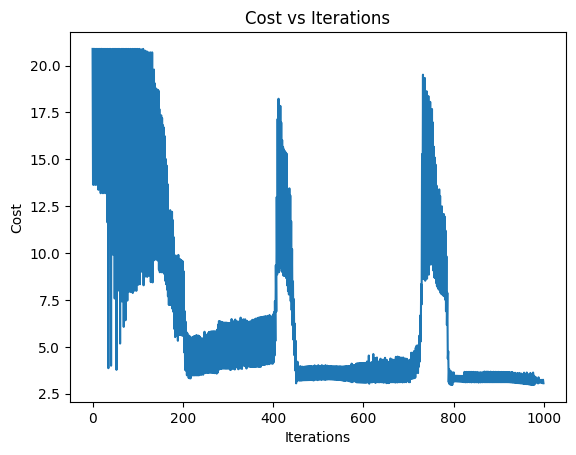

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    2.698404
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


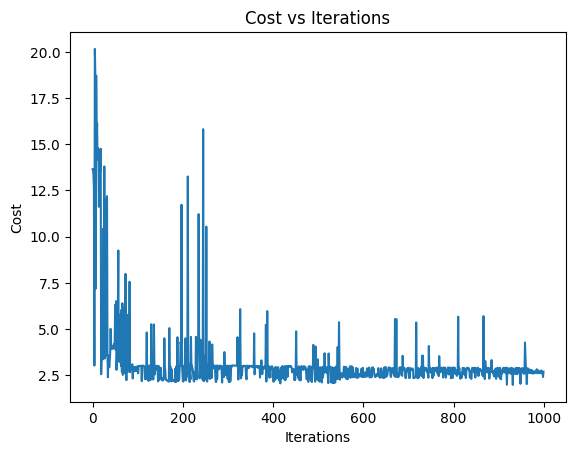

The accuracy of the model is: 
93.54838709677419
The cost of the model is: 
0    0.96878
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
91.17647058823529
The f1_score of the model is: 
95.38461538461539


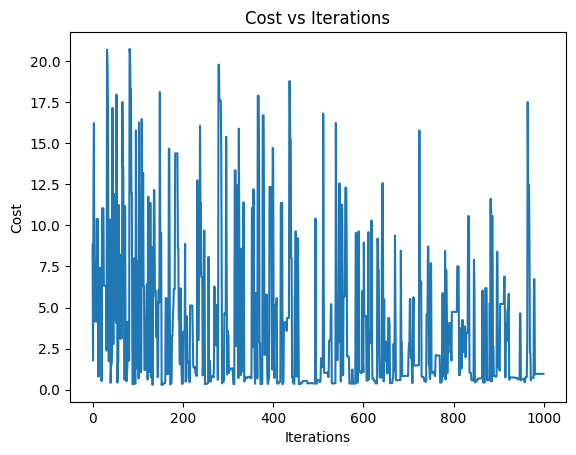

In [61]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('117.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('117_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('117_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
93.01075268817203
The cost of the model is: 
2.316146260447366
The recall of the model is: 
92.74193548387096
The precision of the model is: 
96.63865546218487
The f1_score of the model is: 
94.65020576131685


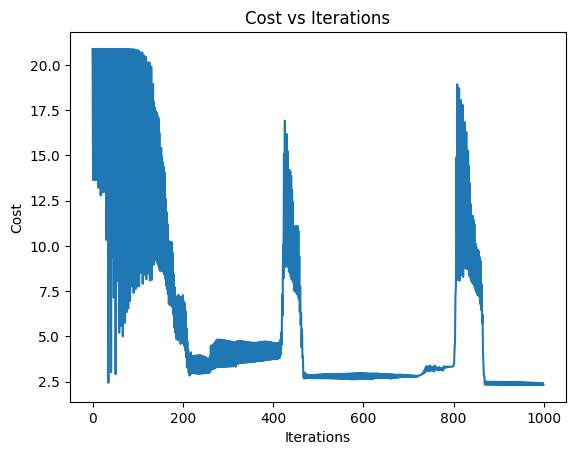

The accuracy of the model is: 
95.16129032258065
The cost of the model is: 
0    0.422075
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.89312977099237
The f1_score of the model is: 
96.47058823529412


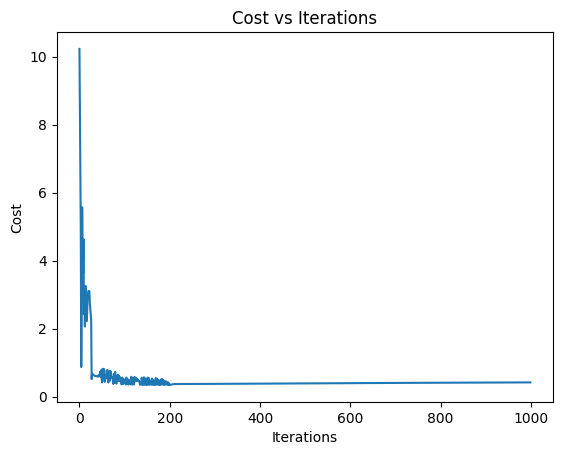

The accuracy of the model is: 
94.08602150537635
The cost of the model is: 
0    0.355588
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
91.85185185185185
The f1_score of the model is: 
95.75289575289574


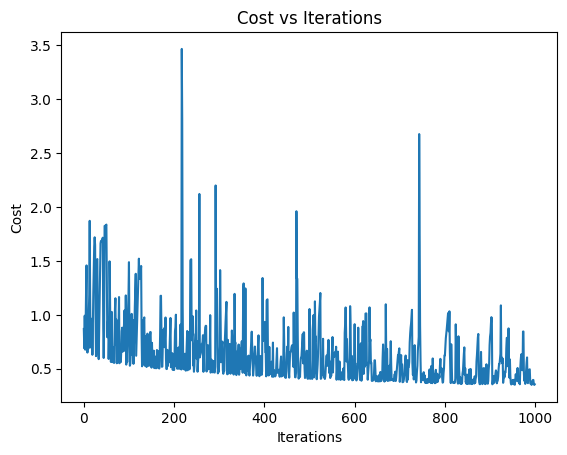

In [62]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('118.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('118_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('118_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.4

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
89.78494623655914
The cost of the model is: 
1.645944307877238
The recall of the model is: 
100.0
The precision of the model is: 
86.7132867132867
The f1_score of the model is: 
92.88389513108613


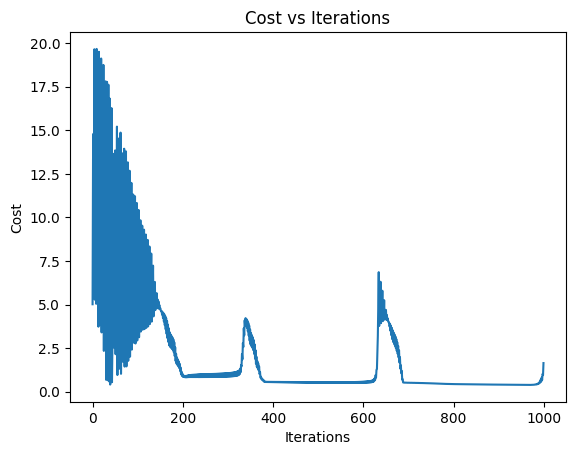

The accuracy of the model is: 
93.54838709677419
The cost of the model is: 
0    0.225636
dtype: float64
The recall of the model is: 
95.96774193548387
The precision of the model is: 
94.44444444444444
The f1_score of the model is: 
95.2


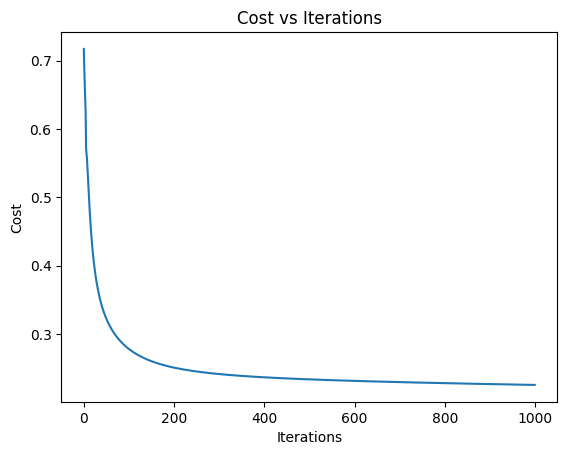

The accuracy of the model is: 
94.08602150537635
The cost of the model is: 
0    0.5873
dtype: float64
The recall of the model is: 
95.96774193548387
The precision of the model is: 
95.19999999999999
The f1_score of the model is: 
95.58232931726909


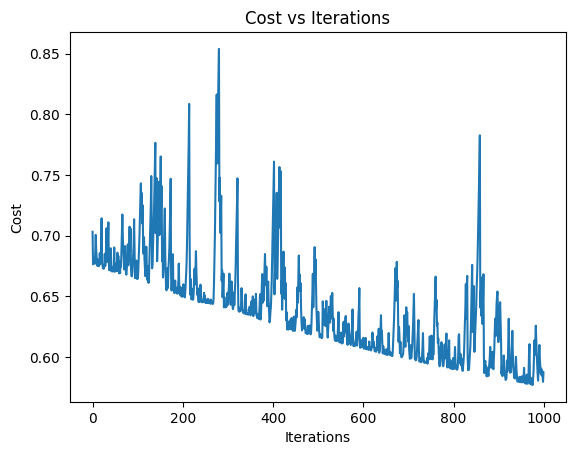

In [63]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('119.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('119_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('119_2.jpg')
plt.show()

# ****END OF PART->3****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descen

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(377, 30) (186, 30) (377, 1) (186, 1)


In [65]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        X=pd.DataFrame(X)
        Y=pd.DataFrame(Y)
        k = np.random.randint(0,m)
        X_batch=X.iloc[k,:]
        Y_batch=Y.iloc[k,:]
        X_batch=X_batch.to_numpy()
        Y_batch=Y_batch.to_numpy()
        X_batch.shape=(1,X_batch.shape[0])
        y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.6,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
3.056956247832555
The recall of the model is: 
91.12903225806451
The precision of the model is: 
97.41379310344827
The f1_score of the model is: 
94.16666666666667


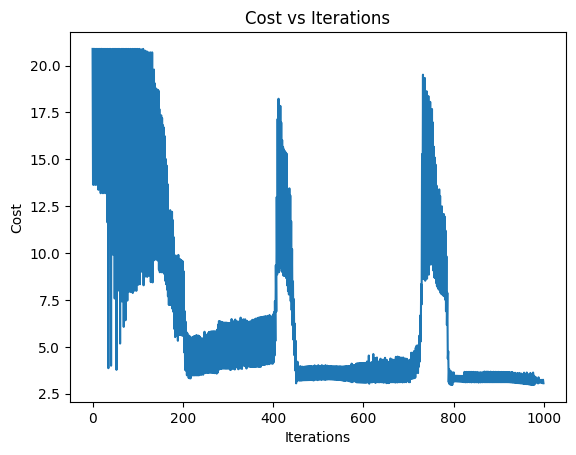

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    2.698404
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


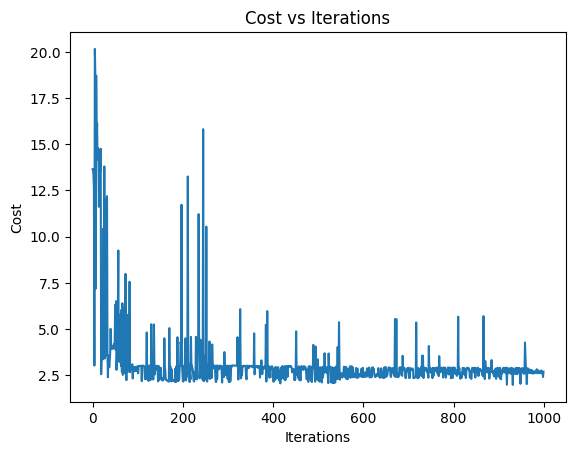

The accuracy of the model is: 
89.24731182795699
The cost of the model is: 
0    2.17946
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
86.11111111111111
The f1_score of the model is: 
92.53731343283582


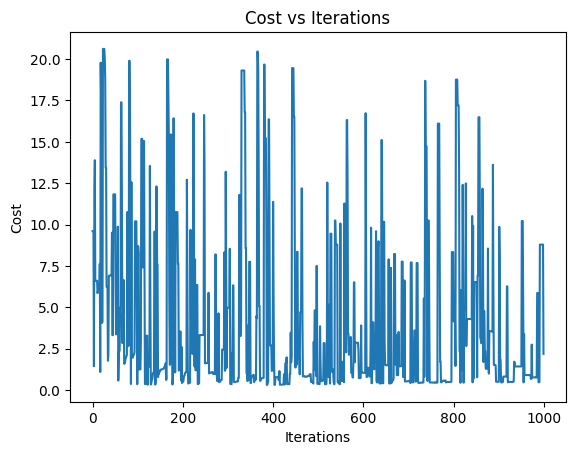

In [66]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1110.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1110_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1110_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
2.316146260447366
The recall of the model is: 
91.93548387096774
The precision of the model is: 
96.61016949152543
The f1_score of the model is: 
94.21487603305786


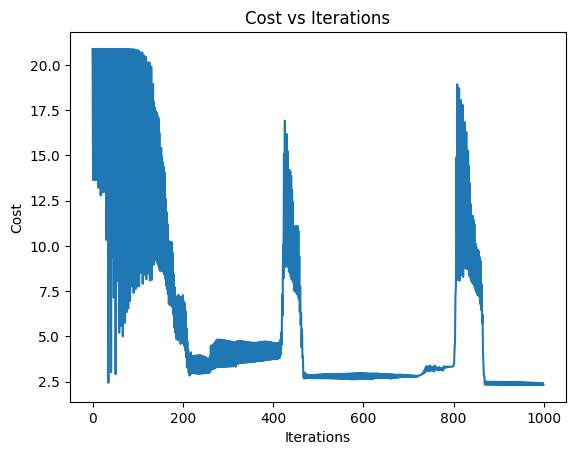

The accuracy of the model is: 
96.23655913978494
The cost of the model is: 
0    0.422075
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
95.34883720930233
The f1_score of the model is: 
97.23320158102766


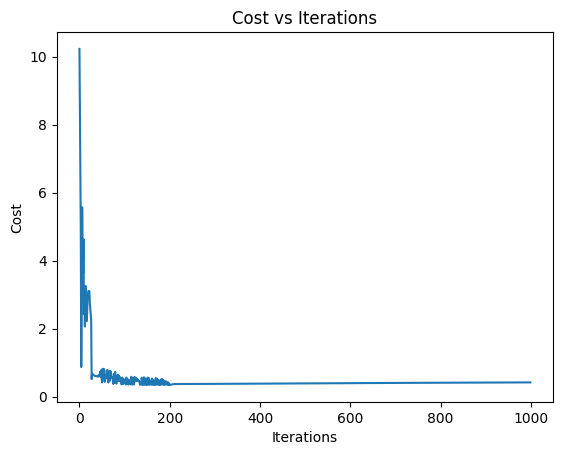

The accuracy of the model is: 
88.70967741935483
The cost of the model is: 
0    0.348427
dtype: float64
The recall of the model is: 
87.09677419354838
The precision of the model is: 
95.57522123893806
The f1_score of the model is: 
91.13924050632913


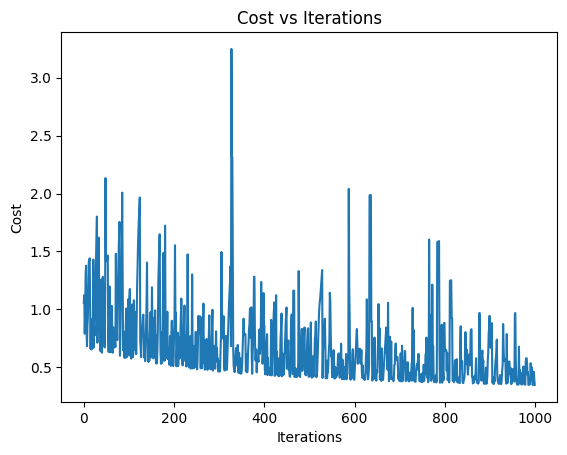

In [67]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1111.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1111_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1111_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.6

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
89.78494623655914
The cost of the model is: 
1.645944307877238
The recall of the model is: 
100.0
The precision of the model is: 
86.7132867132867
The f1_score of the model is: 
92.88389513108613


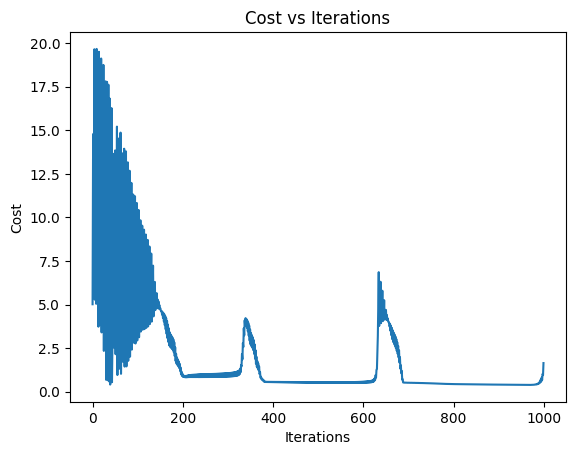

The accuracy of the model is: 
93.54838709677419
The cost of the model is: 
0    0.225636
dtype: float64
The recall of the model is: 
93.54838709677419
The precision of the model is: 
96.66666666666667
The f1_score of the model is: 
95.08196721311477


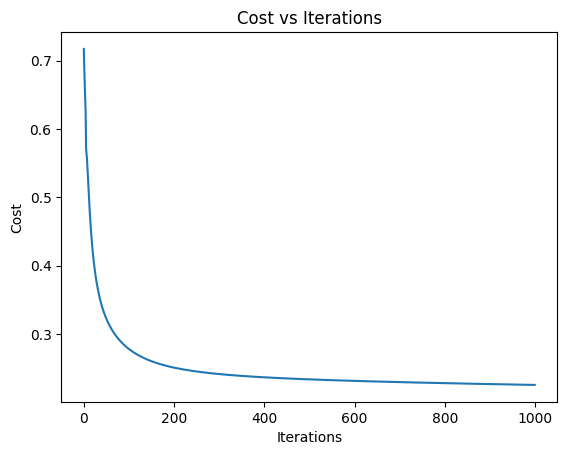

The accuracy of the model is: 
33.33333333333333
The cost of the model is: 
0    0.583489
dtype: float64
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


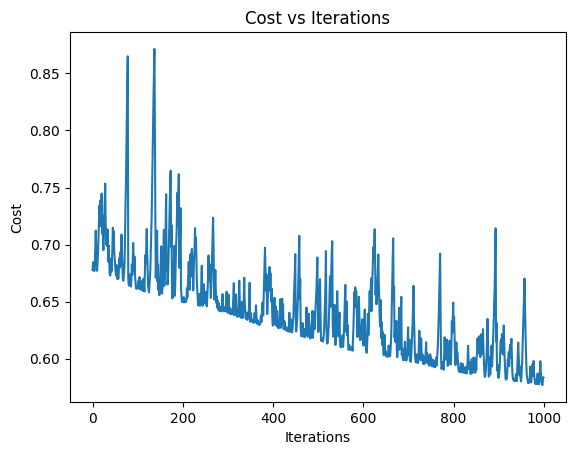

In [68]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1112.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1112_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1112_2.jpg')
plt.show()

# ****END OF PART->4****

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.01

4.Iterations=1000

5.For all the 3 type of gradient_descen

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(377, 30) (186, 30) (377, 1) (186, 1)


In [70]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,Y,w,b):
    m=X.shape[0]
    y_pred=sigmoid(np.dot(X,w)+b)
    cost=(-1/m)*np.sum(Y*np.log(y_pred+1e-15)+(1-Y)*np.log(1-y_pred+1e-15))
    return cost

def batch_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        y_pred=sigmoid(np.dot(X,w)+b)
        w=w-(learning_rate/m)*np.dot(X.T,(y_pred-Y))
        b=b-(learning_rate/m)*np.sum(y_pred-Y)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def mini_batch_gradient_descent(X,Y,w,b,learning_rate,iterations,batch_size):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        for j in range(0,m,batch_size):
            X=pd.DataFrame(X)
            Y=pd.DataFrame(Y)
            X_batch=X.iloc[j:j+batch_size,:]
            Y_batch=Y.iloc[j:j+batch_size,:]
            X_batch=X_batch.to_numpy()
            Y_batch=Y_batch.to_numpy()
            y_pred=sigmoid(np.dot(X_batch,w)+b)
            w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
            b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def stochastic_gradient_descent(X,Y,w,b,learning_rate,iterations):
    m=X.shape[0]
    cost_list=[]
    for i in range(iterations):
        X=pd.DataFrame(X)
        Y=pd.DataFrame(Y)
        k = np.random.randint(0,m)
        X_batch=X.iloc[k,:]
        Y_batch=Y.iloc[k,:]
        X_batch=X_batch.to_numpy()
        Y_batch=Y_batch.to_numpy()
        X_batch.shape=(1,X_batch.shape[0])
        y_pred=sigmoid(np.dot(X_batch,w)+b)
        w=w-(learning_rate/m)*np.dot(X_batch.T,(y_pred-Y_batch))
        b=b-(learning_rate/m)*np.sum(y_pred-Y_batch)
        cost=cost_function(X,Y,w,b)
        cost_list.append(cost)
    return w,b,cost_list

def predict(X,w,b):
    y_pred=sigmoid(np.dot(X,w)+b)
    y_pred=np.where(y_pred>0.7,1,0)
    return y_pred

def accuracy(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    return (np.sum(y_pred==Y_test)/Y_test.shape[0])*100

def recall(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fn=np.sum(np.logical_and(y_pred==0,Y_test==1))
    return (tp/(tp+fn))*100

def precision(y_pred,Y_test):
    y_pred=y_pred.reshape(Y_test.shape)
    tp=np.sum(np.logical_and(y_pred==1,Y_test==1))
    fp=np.sum(np.logical_and(y_pred==1,Y_test==0))
    return (tp/(tp+fp))*100

def f1_score(y_pred,Y_test):
    p=precision(y_pred,Y_test)
    r=recall(y_pred,Y_test)
    return (2*p*r)/(p+r)

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
3.056956247832555
The recall of the model is: 
91.12903225806451
The precision of the model is: 
97.41379310344827
The f1_score of the model is: 
94.16666666666667


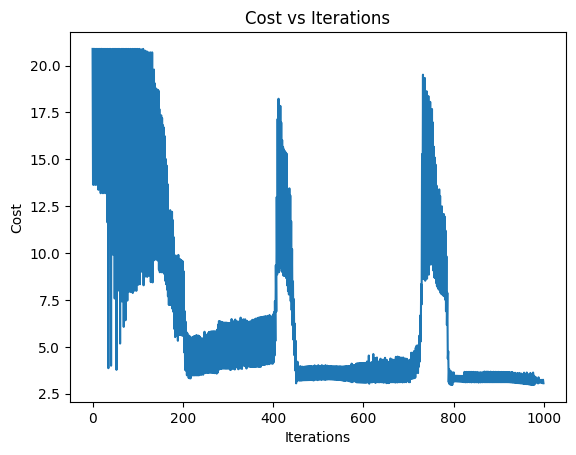

The accuracy of the model is: 
94.6236559139785
The cost of the model is: 
0    2.698404
dtype: float64
The recall of the model is: 
99.19354838709677
The precision of the model is: 
93.18181818181817
The f1_score of the model is: 
96.09374999999999


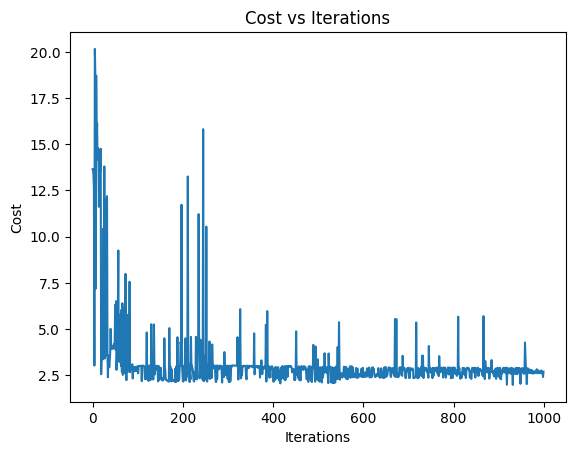

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
0    1.209957
dtype: float64
The recall of the model is: 
100.0
The precision of the model is: 
89.85507246376811
The f1_score of the model is: 
94.6564885496183


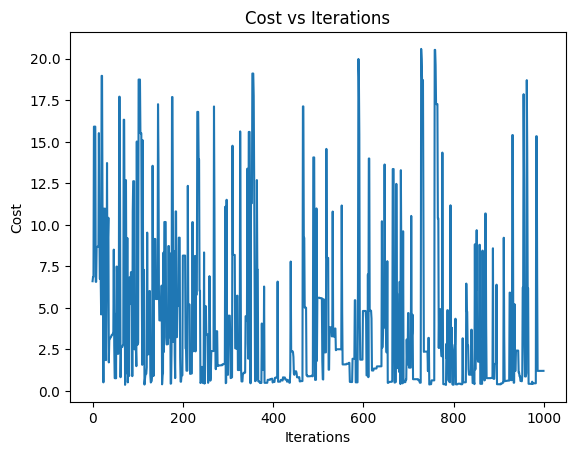

In [71]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1113.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1113_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1113_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
92.47311827956989
The cost of the model is: 
2.316146260447366
The recall of the model is: 
91.93548387096774
The precision of the model is: 
96.61016949152543
The f1_score of the model is: 
94.21487603305786


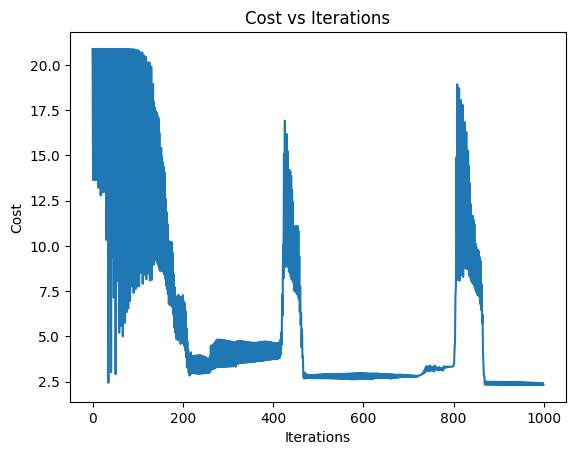

The accuracy of the model is: 
96.23655913978494
The cost of the model is: 
0    0.422075
dtype: float64
The recall of the model is: 
98.38709677419355
The precision of the model is: 
96.06299212598425
The f1_score of the model is: 
97.21115537848605


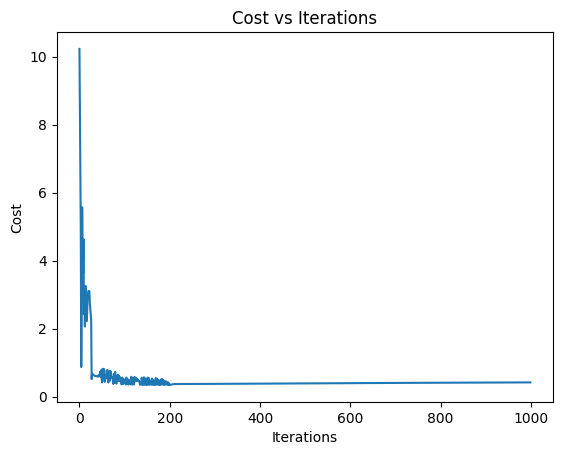

The accuracy of the model is: 
90.32258064516128
The cost of the model is: 
0    0.374978
dtype: float64
The recall of the model is: 
89.51612903225806
The precision of the model is: 
95.6896551724138
The f1_score of the model is: 
92.5


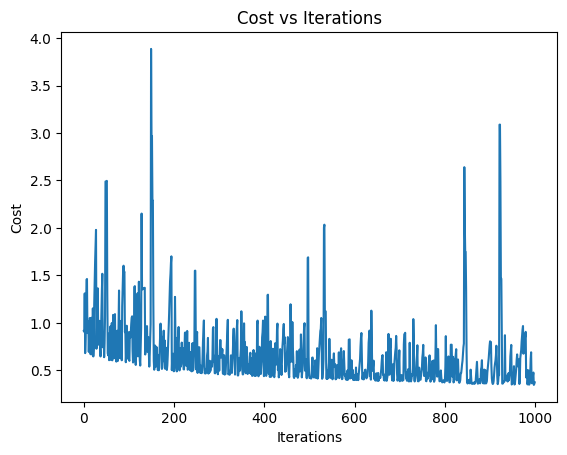

In [72]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1114.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1114_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1114_2.jpg')
plt.show()

Model with following details:

1.Training and Testing split with random_state=42

2.Threshold=0.7

3.Learning_rate=0.0001

4.Iterations=1000

5.For all the 3 type of gradient_descen

The accuracy of the model is: 
89.78494623655914
The cost of the model is: 
1.645944307877238
The recall of the model is: 
100.0
The precision of the model is: 
86.7132867132867
The f1_score of the model is: 
92.88389513108613


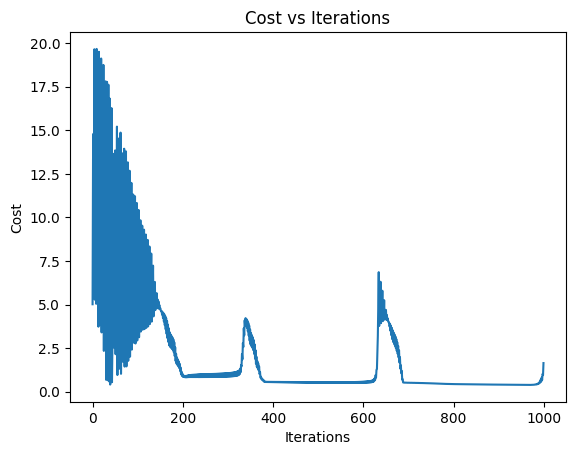

The accuracy of the model is: 
90.86021505376344
The cost of the model is: 
0    0.225636
dtype: float64
The recall of the model is: 
87.90322580645162
The precision of the model is: 
98.1981981981982
The f1_score of the model is: 
92.76595744680851


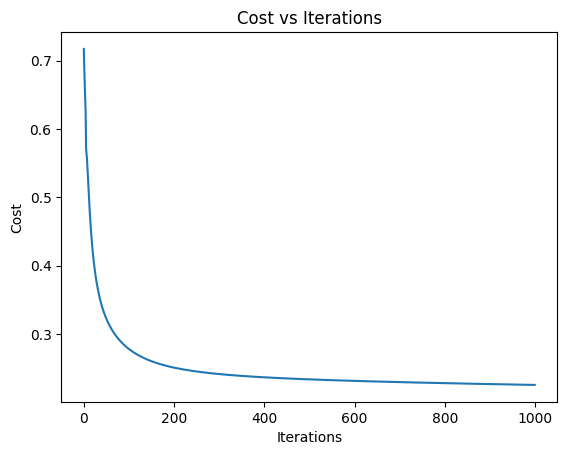

The accuracy of the model is: 
33.33333333333333
The cost of the model is: 
0    0.584116
dtype: float64
The recall of the model is: 
0.0
The precision of the model is: 
nan
The f1_score of the model is: 
nan


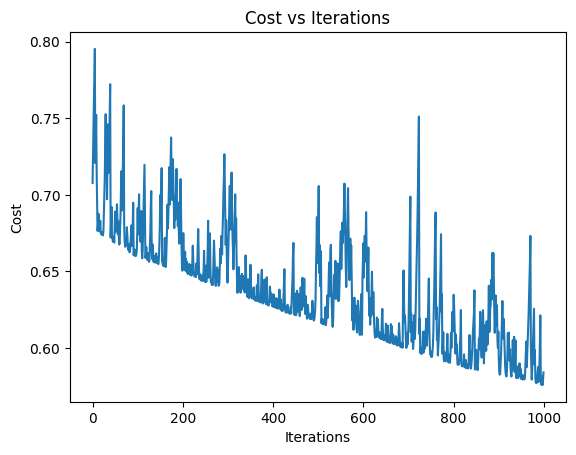

In [73]:
#initializing the parameters
w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1115.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=mini_batch_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000,batch_size=32)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1115_1.jpg')
plt.show()

w=np.zeros((X_train.shape[1],1))
b=0
w,b,cost_list=stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.0001,iterations=1000)
y_pred=predict(X_test,w,b)
print("The accuracy of the model is: ")
print(accuracy(y_pred,Y_test))
print("The cost of the model is: ")
print(cost_list[-1])
print("The recall of the model is: ")
print(recall(y_pred,Y_test))
print("The precision of the model is: ")
print(precision(y_pred,Y_test))
print("The f1_score of the model is: ")
print(f1_score(y_pred,Y_test))
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.savefig('1115_2.jpg')
plt.show()

# ****END OF PART->5****